# What features must be considered to get good quality of teaching and which country is providing best quality of teaching?

Importing all required libraries.

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
NumPy is for adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from scipy import stats
%matplotlib inline
import seaborn as sns

In [103]:
# Mounting Google drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Moving to the particular folder where original data set is present.

In [104]:
%cd "/content/drive/My Drive/Colab"

/content/drive/My Drive/Colab


**Reading the data set**

Pandas library has inbuilt function which reads the file. So by using that we are reading the file.

In [105]:
uniDataframe = pd.read_csv('timesData.csv')
uniDataframe2 = pd.read_csv('timesData.csv')

Printing first 5 rows by using head() function.

In [106]:
uniDataframe.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


Shape of the data frame.

In [107]:
uniDataframe.shape

(2603, 14)

Checking all the column names.

In [108]:
uniDataframe.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

# Data cleaning for Visualizations

Checking whether dataset has any null values or not by using isnull().

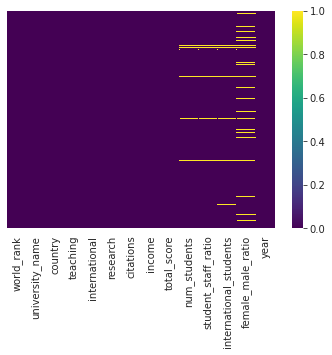

In [109]:
sns.heatmap(uniDataframe.isnull(),yticklabels=False,cbar=True,cmap='viridis')

**Handling Missing / null / irregular information.**

Checking how many unpredectable data present for total score column.

In [110]:
uniDataframe.index[uniDataframe['total_score'] == '-']

Int64Index([ 400,  401,  402,  403,  404,  405,  406,  407,  408,  409,
            ...
            2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602],
           dtype='int64', length=1402)

Checking how many unpredectable data present for international column.

In [111]:
uniDataframe.index[uniDataframe['international'] == '-']

Int64Index([16, 43, 49, 92, 128, 130, 137, 172, 199], dtype='int64')

For 8 universities international values are blank (-).

Checking how many unpredectable data present for income column.

In [112]:
uniDataframe.index[uniDataframe['income'] == '-']

Int64Index([   4,    7,    9,   10,   11,   14,   16,   17,   24,   25,
            ...
            2469, 2474, 2508, 2511, 2556, 2566, 2573, 2574, 2575, 2595],
           dtype='int64', length=218)

Dropping the rows which contains unpredictable values from total score, international and income rows.

In [113]:
uniDataframe.drop(uniDataframe.index[uniDataframe['total_score'] == '-'], inplace = True)
uniDataframe.drop(uniDataframe.index[uniDataframe['international'] == '-'], inplace = True)
uniDataframe.drop(uniDataframe.index[uniDataframe['income'] == '-'], inplace = True)

Checking null values from the data set.

In [114]:
uniDataframe.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               17
student_staff_ratio        17
international_students     17
female_male_ratio         102
year                        0
dtype: int64

There are null values from the set for removing those we are using dropna function which deletes entire row which has Nan values.

In [115]:
uniDataframe.dropna(inplace=True)

After dropping again checking for Nan values.

In [116]:
uniDataframe.isna().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

Now no Nan values.

Checking university information using info() function.

In [117]:
uniDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 2002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              954 non-null    object 
 1   university_name         954 non-null    object 
 2   country                 954 non-null    object 
 3   teaching                954 non-null    float64
 4   international           954 non-null    object 
 5   research                954 non-null    float64
 6   citations               954 non-null    float64
 7   income                  954 non-null    object 
 8   total_score             954 non-null    object 
 9   num_students            954 non-null    object 
 10  student_staff_ratio     954 non-null    float64
 11  international_students  954 non-null    object 
 12  female_male_ratio       954 non-null    object 
 13  year                    954 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory

Converting object data types into float for future analysis.

In [118]:
uniDataframe['income'] = uniDataframe['income'].astype('float')
uniDataframe['total_score'] = uniDataframe['total_score'].astype('float')
uniDataframe['international'] = uniDataframe['international'].astype('float')


Size checking.

In [119]:
uniDataframe.shape

(954, 14)

# Data Cleaning for analysis

Checking Nan values.

In [120]:
for col in uniDataframe2.columns:
    pct_missing = np.mean(uniDataframe2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

world_rank - 0%
university_name - 0%
country - 0%
teaching - 0%
international - 0%
research - 0%
citations - 0%
income - 0%
total_score - 0%
num_students - 2%
student_staff_ratio - 2%
international_students - 3%
female_male_ratio - 9%
year - 0%


Replacing "-" values with Nan for total score, income and international.

In [121]:
uniDataframe2['international'] = uniDataframe2['international'].replace('-', np.nan)
uniDataframe2['income'] = uniDataframe2['income'].replace('-', np.nan)
uniDataframe2['total_score'] = uniDataframe2['total_score'].replace('-', np.nan)

In [122]:
for col in uniDataframe2.columns:
    pct_missing = np.mean(uniDataframe2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

world_rank - 0%
university_name - 0%
country - 0%
teaching - 0%
international - 0%
research - 0%
citations - 0%
income - 8%
total_score - 54%
num_students - 2%
student_staff_ratio - 2%
international_students - 3%
female_male_ratio - 9%
year - 0%


Information checking.

In [123]:
uniDataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   object 
 8   total_score             1201 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

Data type conversions.

In [124]:
uniDataframe2['international'] = uniDataframe2['international'].astype(float)
uniDataframe2['income'] = uniDataframe2['income'].astype(float)
uniDataframe2['total_score'] = uniDataframe2['total_score'].astype(float)
uniDataframe2['num_students'] = [float(str(i).replace(",", "")) for i in uniDataframe2['num_students']]

Replacing Nan values with median in international column.

In [125]:
international_med = uniDataframe2['international'].median()
uniDataframe2['international'] = uniDataframe2['international'].fillna(international_med)

Replacing Nan values with mode in income column.

In [126]:
mode_income = uniDataframe2["income"].mode()[0]
uniDataframe2['income'] = uniDataframe2['income'].fillna( mode_income)

Replacing Nan values with mode for total score column.

In [127]:
mode_total_score = uniDataframe2["total_score"].mode()[0]
uniDataframe2['total_score'] = uniDataframe2['total_score'].fillna( mode_total_score)

Replacing Nan values mode for number of students column.

In [128]:
mode_num_students = uniDataframe2["num_students"].mode()[0]
uniDataframe2['num_students'] = uniDataframe2['num_students'].fillna( mode_num_students)

In [129]:
uniDataframe2.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

Dropping unused columns.

In [130]:
uniDataframe2.drop(columns=['female_male_ratio','international_students','student_staff_ratio'])

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,100.0,94.2,7929.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,49.0,21958.0,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,49.0,31268.0,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,49.0,4122.0,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,49.0,10117.0,2016


Removing extra spaces from "country" column by using strip function.

In [131]:
uniDataframe2['country'] = uniDataframe2['country'].str.strip() 

# Statistical Analysis

By using describe function all the satistical values for inputs are shown below.

In [132]:
uniDataframe2.describe()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,52.001537,35.910257,60.921629,53.252785,54.004303,23382.905878,18.445283,2014.075682
std,17.604218,22.065792,21.254805,23.073219,24.714967,10.239459,17769.283295,11.458698,1.685733
min,9.900000,7.100000,2.900000,1.200000,24.200000,41.400000,462.000000,0.600000,2011.000000
25%,24.700000,33.500000,19.600000,45.500000,33.600000,49.000000,12199.500000,11.975000,2013.000000
50%,33.900000,50.300000,30.500000,62.500000,42.600000,49.000000,20584.000000,16.100000,2014.000000
75%,46.400000,69.000000,47.250000,79.050000,69.500000,54.800000,29787.000000,21.500000,2016.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,379231.000000,162.600000,2016.000000


Teaching field description

In [133]:
uniDataframe2.teaching.describe()

count    2603.000000
mean       37.801498
std        17.604218
min         9.900000
25%        24.700000
50%        33.900000
75%        46.400000
max        99.700000
Name: teaching, dtype: float64

Total 2603 values are present, the mean of the field is 37, standard deviation is 17, mininum value is 9.9 and max value is 99.

In [134]:
uniDataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   float64
 8   total_score             2603 non-null   float64
 9   num_students            2603 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memor

Null value checker.

In [135]:
uniDataframe2.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

Calculating Zscore for output variable.

In [136]:
teachingzscore = stats.zscore(uniDataframe['teaching'])
teachingzscore

array([ 2.93392556e+00,  2.93999738e+00,  2.97035650e+00,  2.49675425e+00,
        2.35710231e+00,  2.41782055e+00,  1.91385918e+00,  1.99279289e+00,
        2.09601389e+00,  1.36132323e+00,  1.27024588e+00,  1.15488123e+00,
        1.49490335e+00,  1.14273758e+00,  1.05773205e+00,  1.12452211e+00,
        1.22167129e+00,  4.38406035e-01,  9.54511046e-01,  1.30667682e+00,
        6.32704392e-01,  9.78798340e-01,  5.65914331e-01,  6.38776215e-01,
        1.05773205e+00,  4.80908800e-01,  4.86980624e-01,  3.41256856e-01,
        9.42367398e-01,  4.80908800e-01,  7.23781747e-01,  1.54954976e+00,
        2.56251325e-01,  5.90201626e-01,  5.53770684e-01,  1.33783787e-02,
        2.55220261e-02, -1.74848155e-01, -1.01986271e-01, -5.34116815e-02,
        1.33096411e+00, -4.23792925e-01,  1.46958499e-01,  5.96273450e-01,
       -5.81660340e-01,  4.32334211e-01, -7.09168636e-01,  8.62402626e-02,
        4.38406035e-01,  1.83389441e-01,  4.98093207e-02,  1.04455734e-01,
       -2.30525632e-02, -

In [137]:
uniDataframe2.shape

(2603, 14)

Median calculation for university data frame.

In [138]:
uniDataframe2.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



teaching                  33.9
international             50.3
research                  30.5
citations                 62.5
income                    42.6
total_score               49.0
num_students           20584.0
student_staff_ratio       16.1
year                    2014.0
dtype: float64

Number of students have highest median.

Mode for university name field.

In [139]:
uniDataframe2.university_name.mode()

0                             Aarhus University
1                      Arizona State University
2                Australian National University
3                          Bielefeld University
4                            Bilkent University
                         ...                   
189                         Zhejiang University
190                    École Normale Supérieure
191            École Normale Supérieure de Lyon
192                         École Polytechnique
193    École Polytechnique Fédérale de Lausanne
Length: 194, dtype: object

# Visualizations

**Pictorial representation of the data is known as visualisations.**

Correlogram for all the inputs.

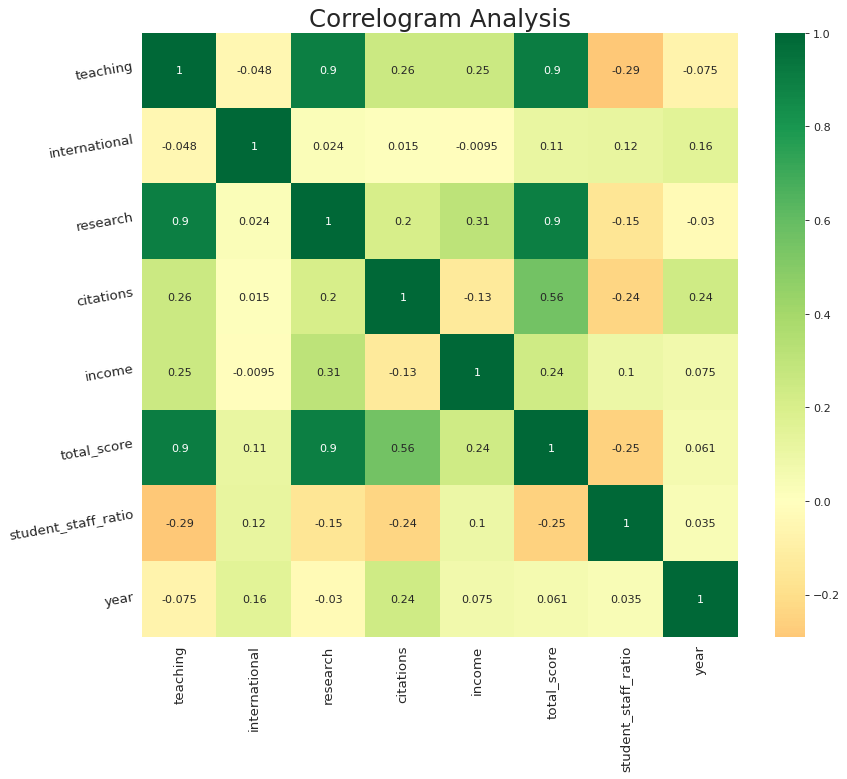

In [140]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(uniDataframe.corr(), xticklabels=uniDataframe.corr().columns, yticklabels=uniDataframe.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram Analysis', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=10)
plt.show()

The result of the correlogram is that the target variable Teaching has positive correlation with total score, international, income,research and citations. Remaining has negative correlation which means those columns are not effecting the teaching quality.

The Kernal density estimation plot is used to visualiaze the input distributions in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



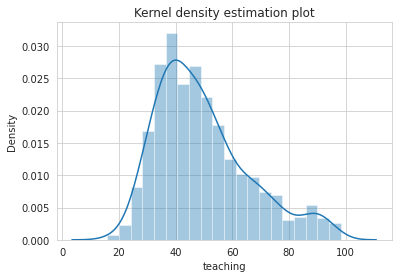

In [141]:
# Plot the teaching using KDE plots.
plt.title('Kernel density estimation plot')
sns.distplot(uniDataframe['teaching'],kde=True, bins=20)
plt.show()

The distribution is exceeded in the between 35-40. Those are not considered as part of analysis they are noises.

**Scatterplot for teaching and total score with respect to country.**

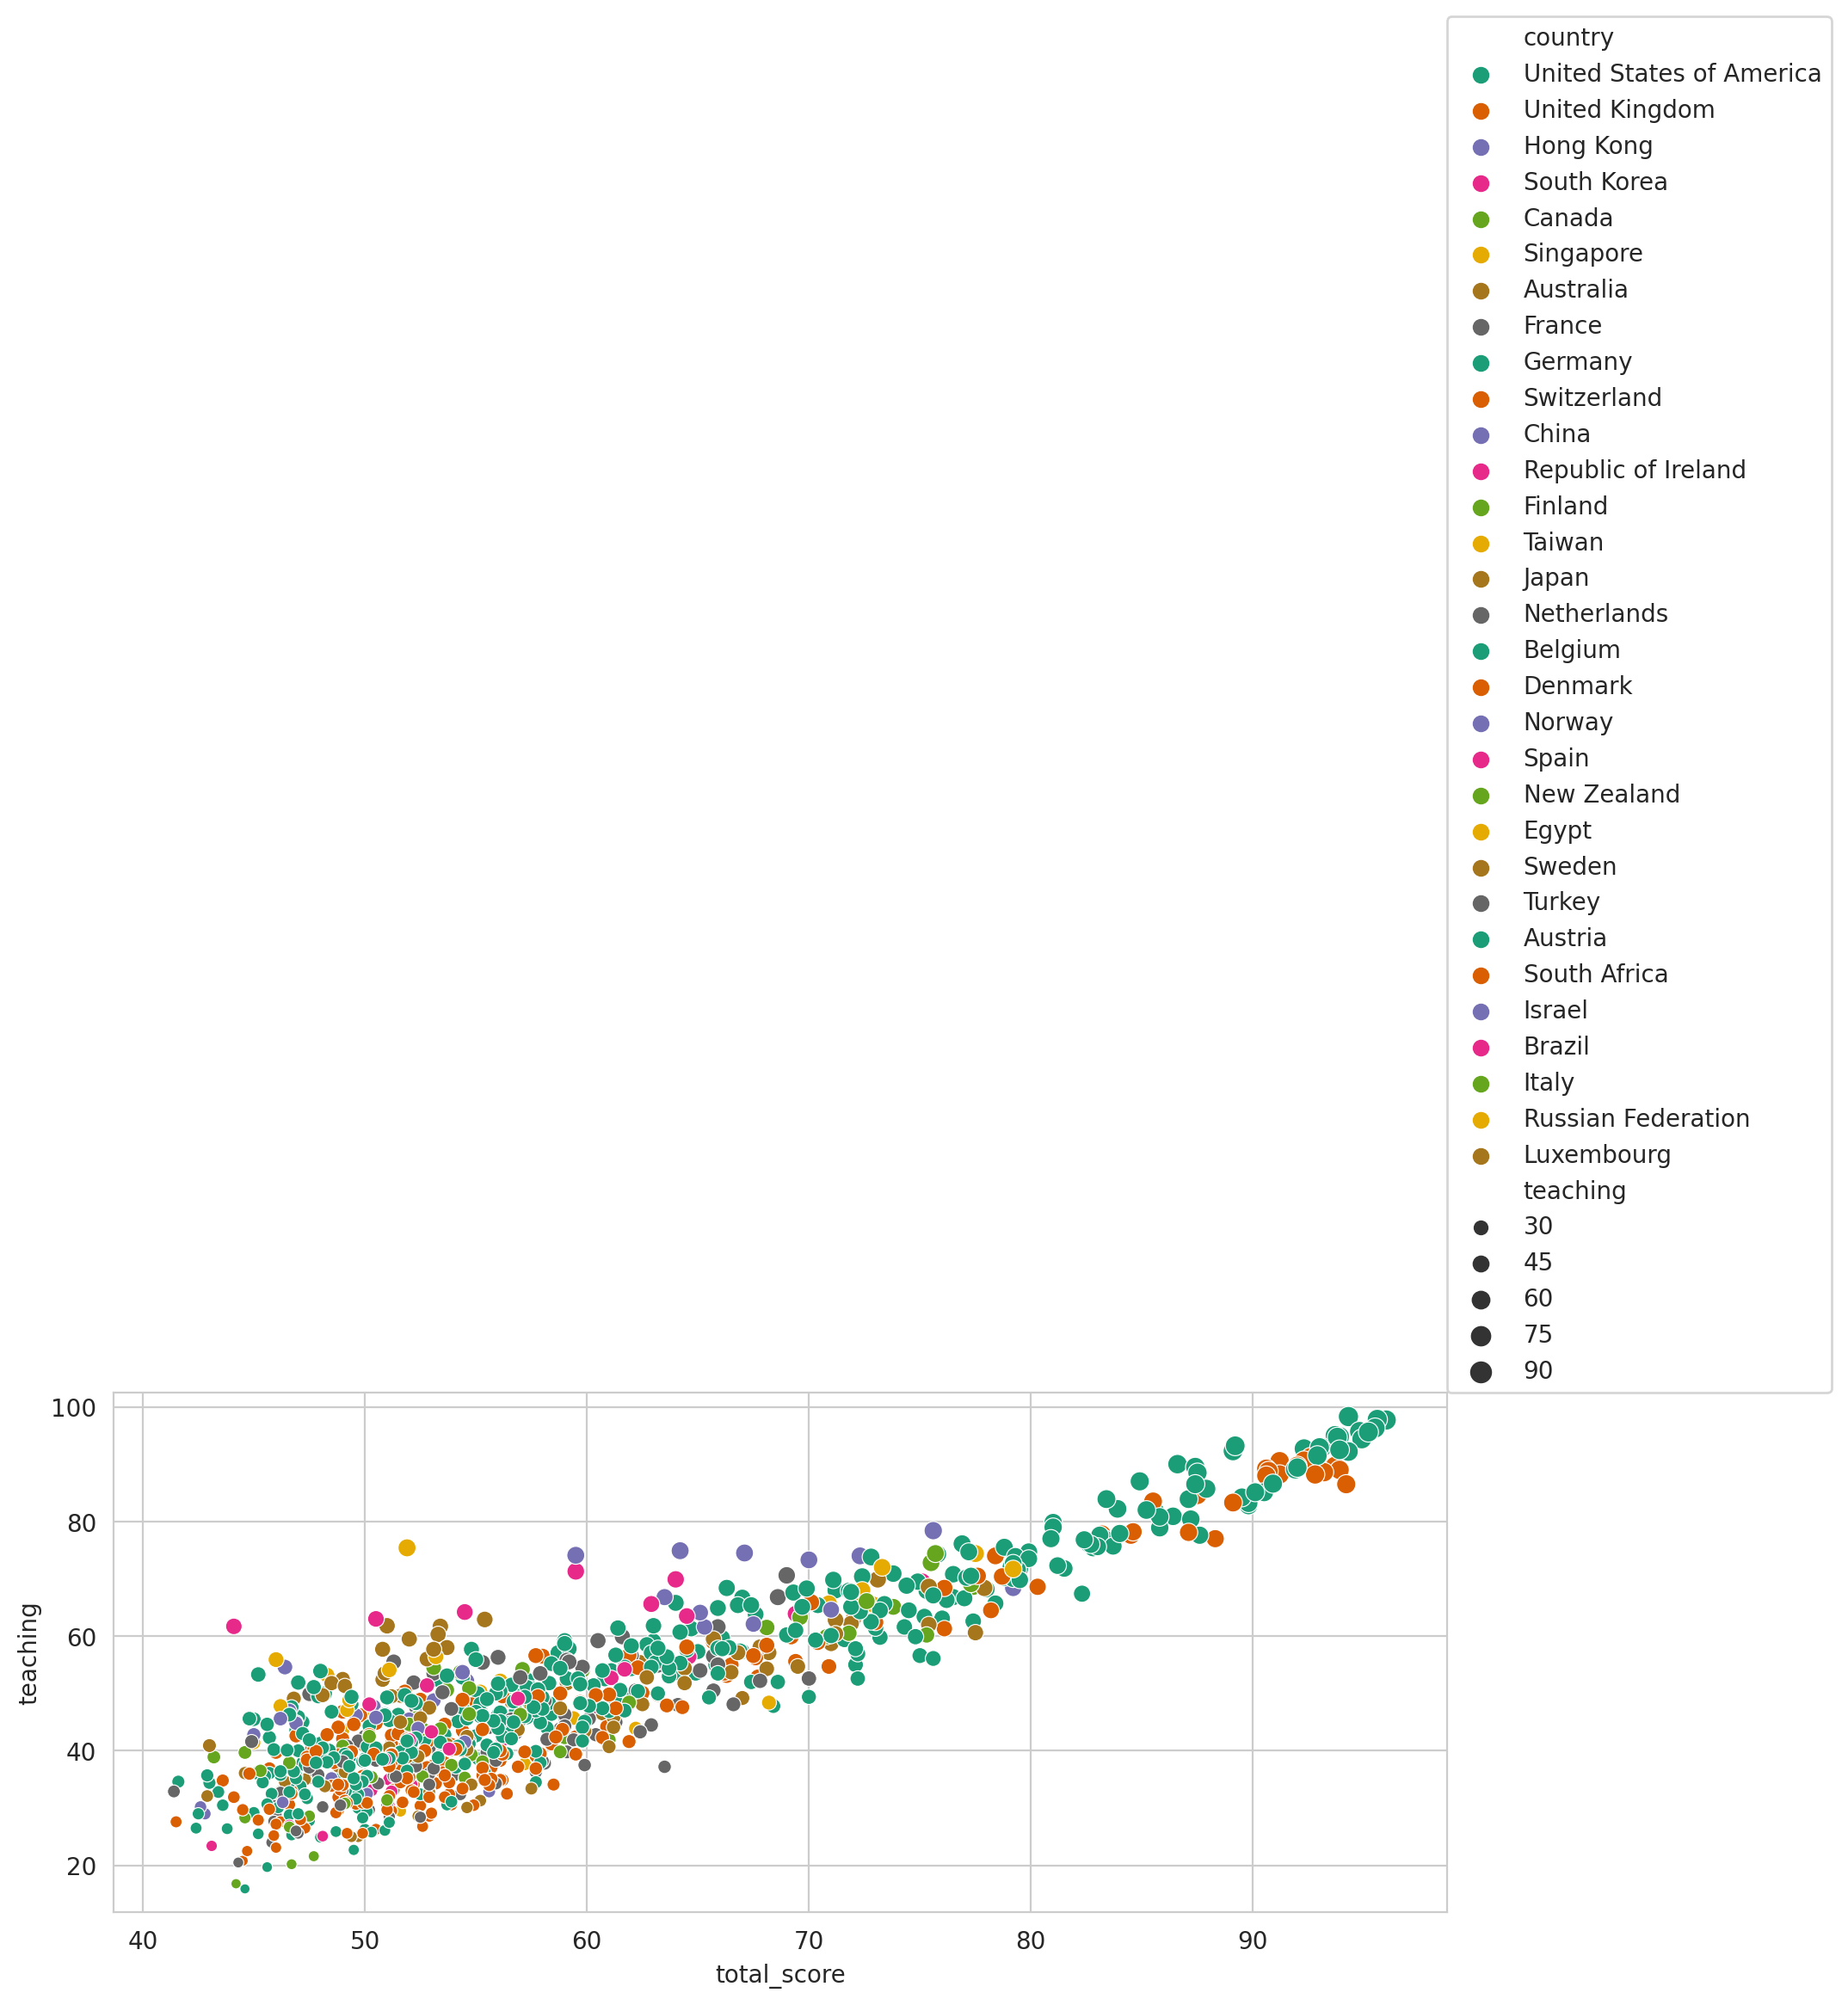

In [142]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=uniDataframe,x="total_score",y="teaching",hue="country",palette="Dark2",size="teaching")
plt.legend(loc=[1,1])

**Count plot is used to count the number of countries present in data set.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

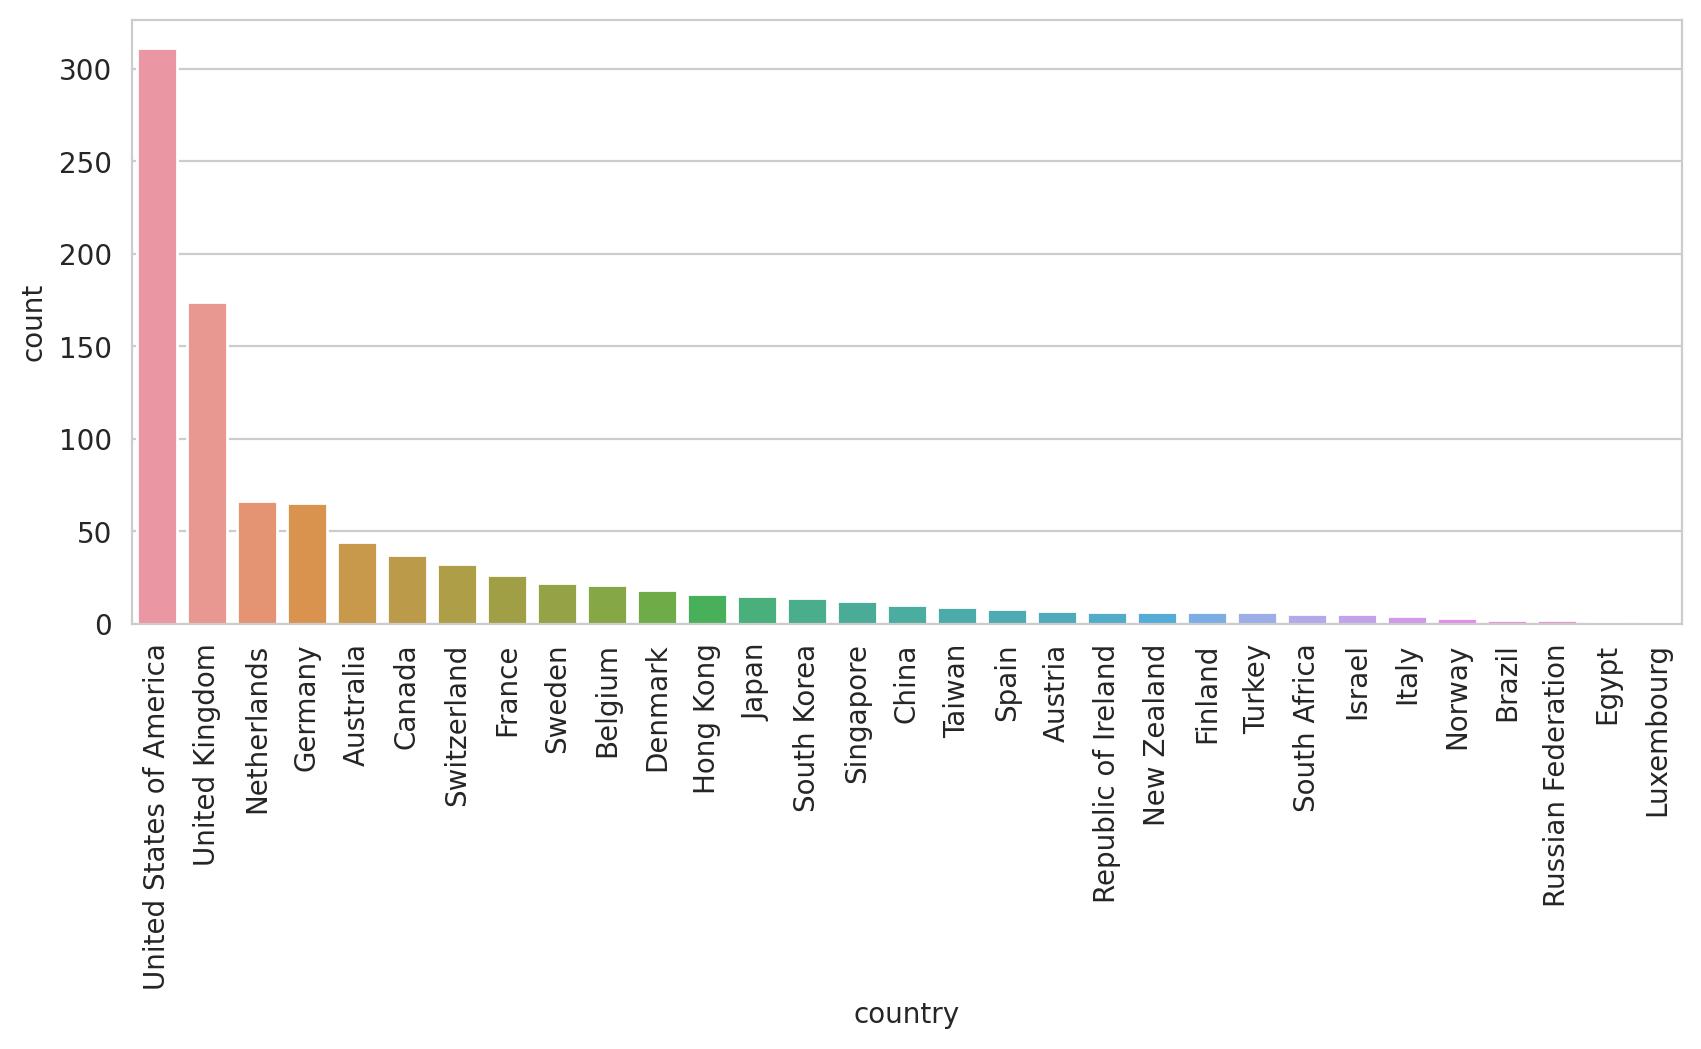

In [143]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=uniDataframe,x="country",order=uniDataframe["country"].value_counts().index)
plt.xticks(rotation=90)

Based on the result United states of America providing good eduction that must be reason for moving all youngester to USA. Least education provider is Luxemburg.

**Distribution plot is used to find the relation between group of distributed data.**

<Figure size 2000x800 with 0 Axes>

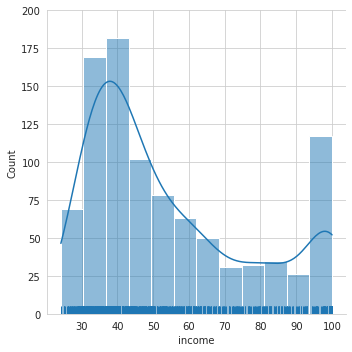

In [144]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=uniDataframe,x='income',kde=True,rug=True)

**Top 100 countries CItation, Teaching and World rank.**

In [145]:
import plotly.graph_objs as go
df_top100 = uniDataframe.iloc[:100,:]
a = go.Scatter(
    x=df_top100["world_rank"],
    y=df_top100["citations"],
    mode = "lines+markers",
    name = "citations",
    marker=dict(color='#bb839b'),
    text=df_top100["university_name"]
)
b = go.Scatter(
    x=df_top100["world_rank"],
    y=df_top100["teaching"],
    mode="lines+markers",
    name="teahing",
    marker=dict(color = "#770737"),
    text= df_top100["university_name"]    
)
layout=dict(title="Citation and Teaching vs World Rank of Top 100 Universities",
            xaxis=dict(title="World Rank"),
           template="plotly_white")
plot = go.Figure(data=[a,b], layout=layout)
plot.show()

For top 100 countries citataions level is more than teaching score

**Defining the relation between research and teaching**

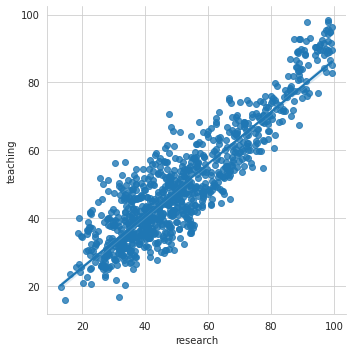

In [146]:

sns.set_style('whitegrid')
sns.lmplot(x ='research', y ='teaching', data = uniDataframe)

Research and Teaching has highest correlation.

**Representing total number of students in 2013.**

In [147]:
fig = go.Figure()
pie_list = [
    float(val.replace(',', '.')) 
    for val in uniDataframe.num_students
]  
# create the traces
for trace in np.arange(0,10,1):
    df2013 = uniDataframe[uniDataframe.year == 2013].iloc[:(trace+1),:]
    fig.add_trace(
        {
          "values": pie_list,
          "labels": df2013.university_name,
          "hoverinfo":"label+percent+name",
          "hole": .3,
          "type": "pie"
        }
    )

fig.show()

Yale university has more number of students.

Scatterplot describes whether input and output variables have any relation or not.

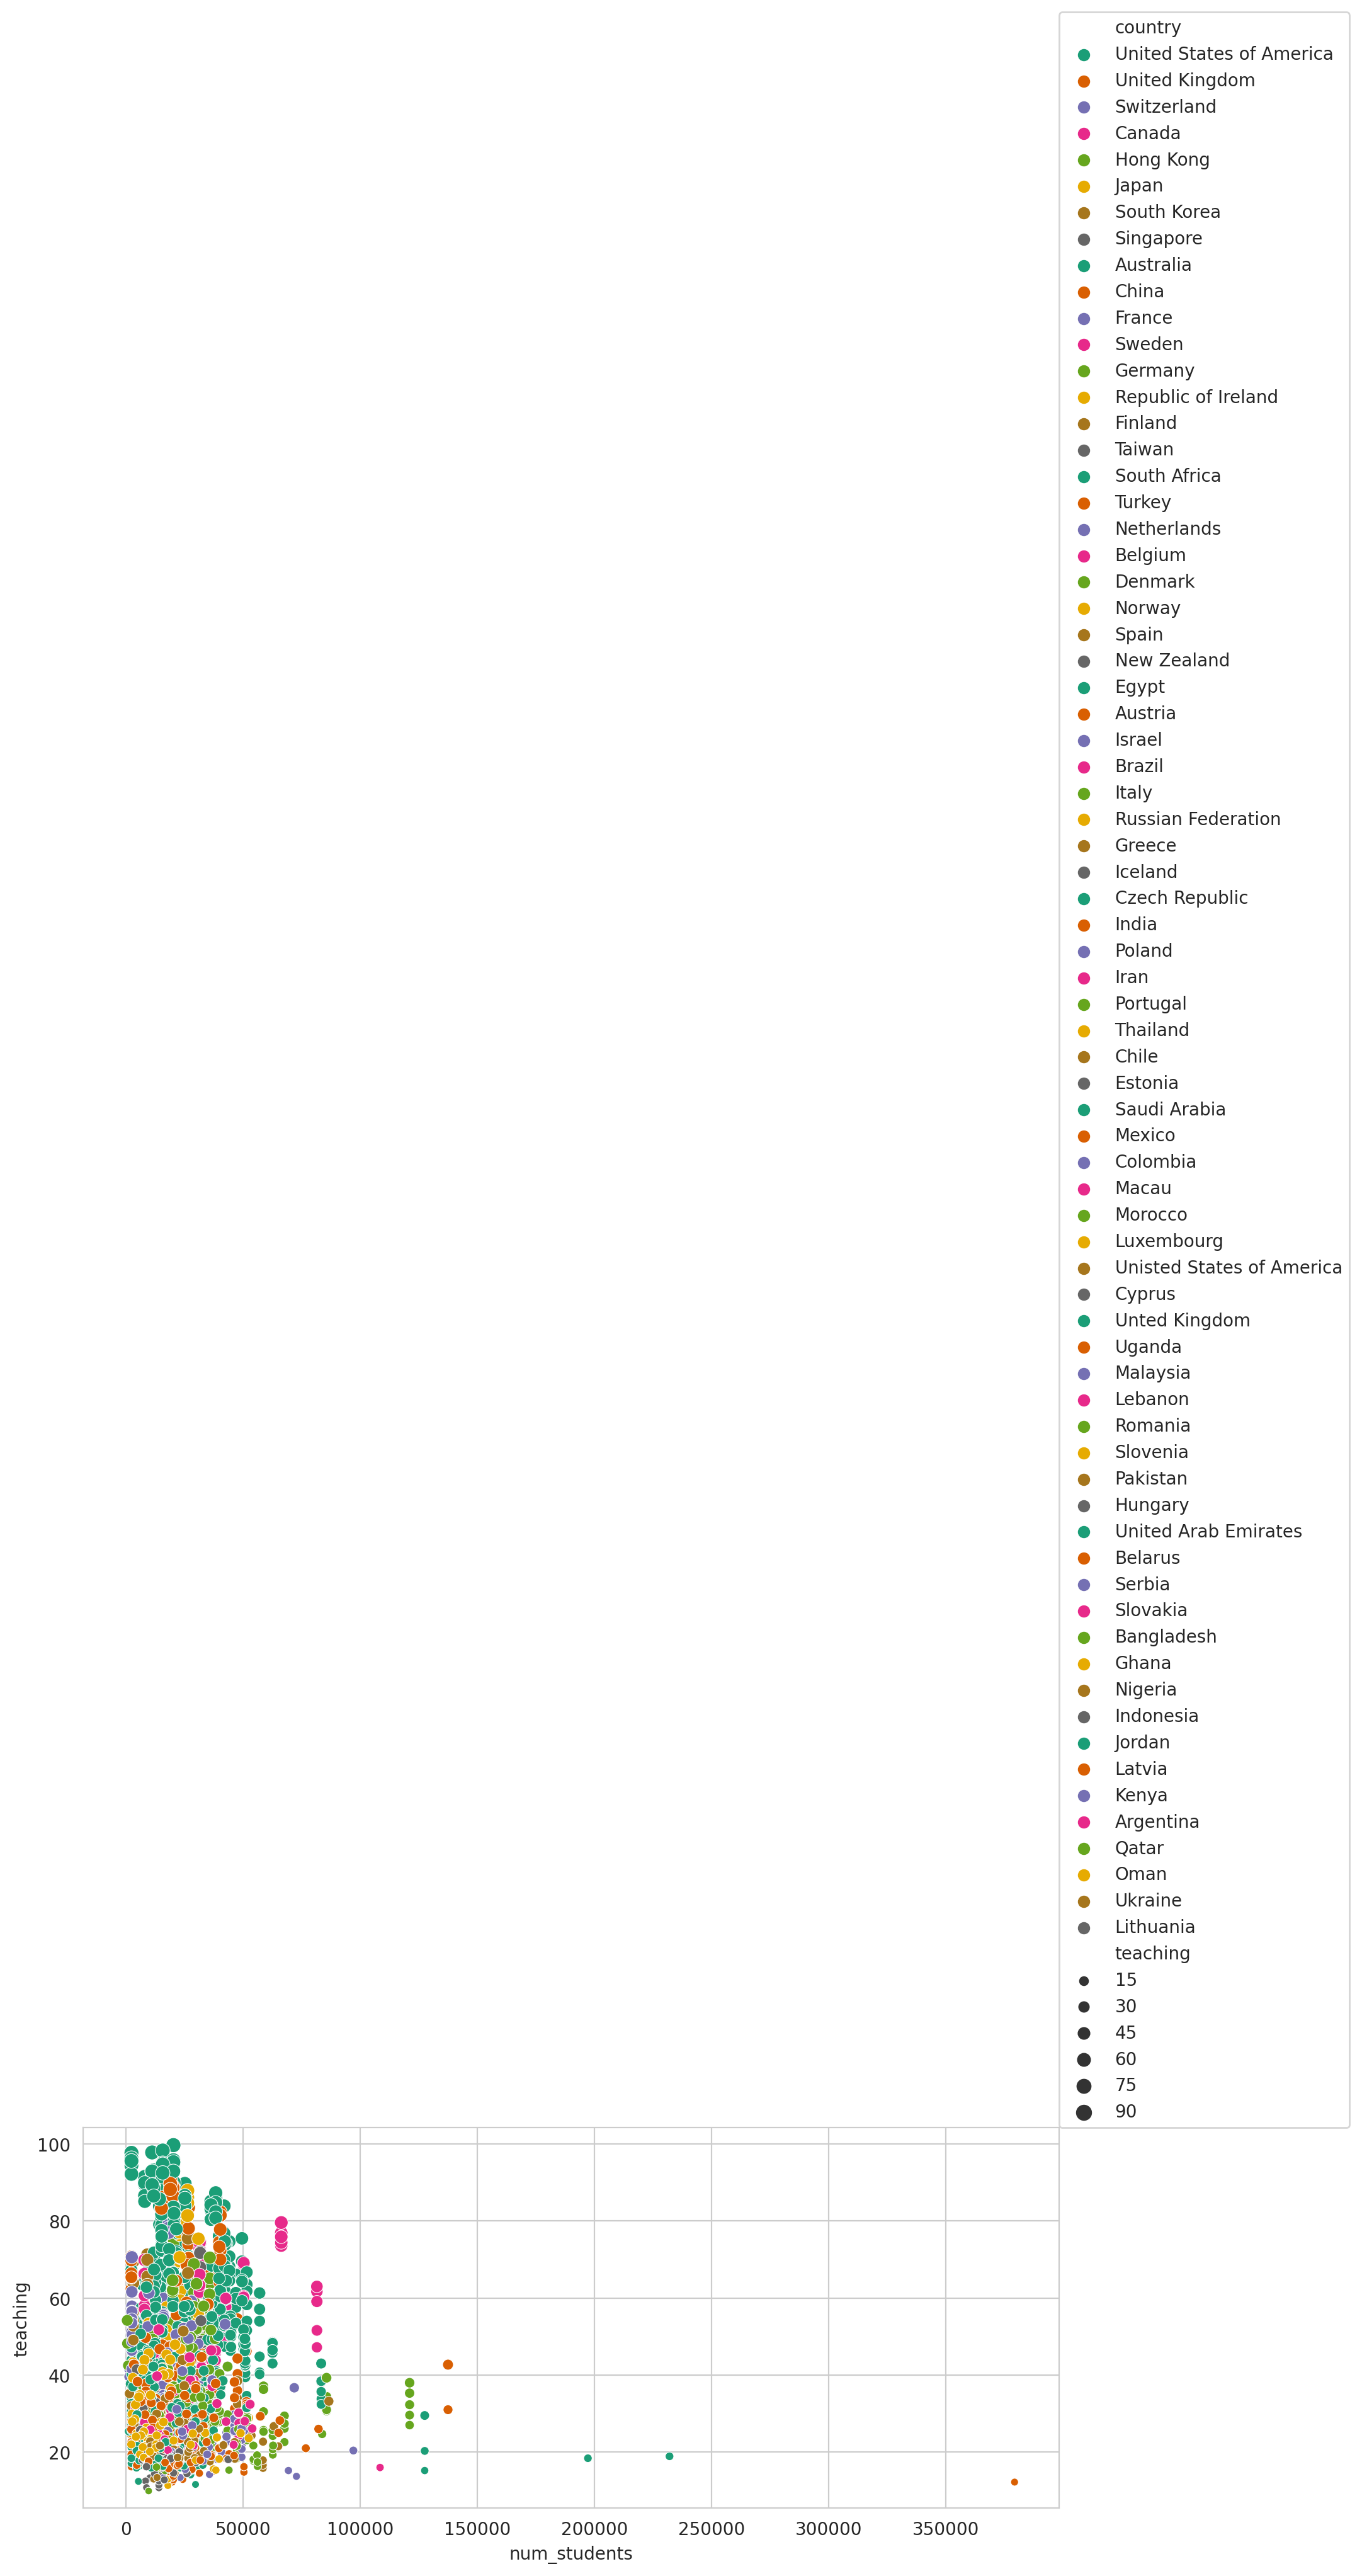

In [148]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=uniDataframe2,x="num_students",y="teaching",hue="country",palette="Dark2",size="teaching")
plt.legend(loc=[1,1])

Number of students and Teaching have positive correlation.

Finding most used country in the data set using worldCloud library

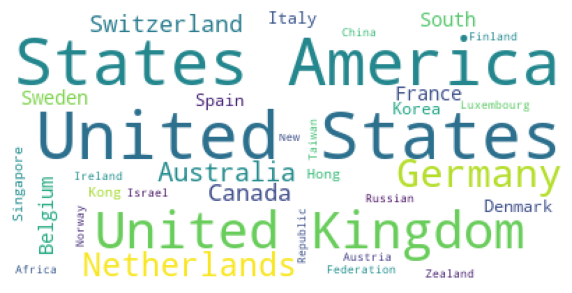

In [149]:
from wordcloud import WordCloud
df_2016 = uniDataframe.country[uniDataframe.year == 2016]
plt.subplots(figsize=(10,10))
uniWordcloud = WordCloud(
              background_color='white',
             ).generate(" ".join(df_2016))
plt.imshow(uniWordcloud)
plt.axis('off')
plt.show()

Based on the results United states contains more universities.

**Bar plot is drawn between year and teaching.**

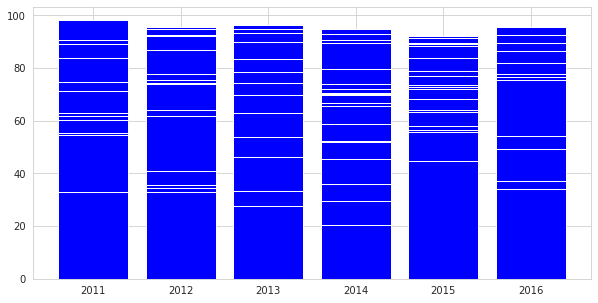

In [150]:
plt.figure(figsize=(20,30)) 
plt.bar(uniDataframe['year'], uniDataframe['teaching'], color="blue")
plt.gcf().set_size_inches(10,5)

**Swarmplot is a combination of box and violin plots.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

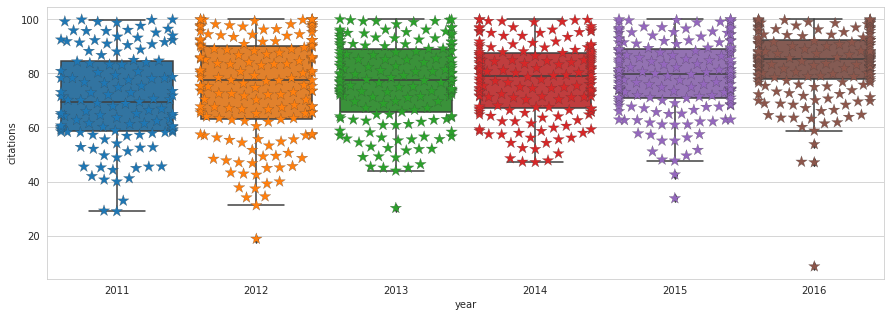

In [151]:
plt.figure(figsize=(15,5))
sns.boxplot(data=uniDataframe,x='year',y='citations')
sns.swarmplot(data=uniDataframe,x='year',y='citations',linewidth=0.2,marker='*',size=12)

**Histogram is used to plot the distribution of the data using bins.**

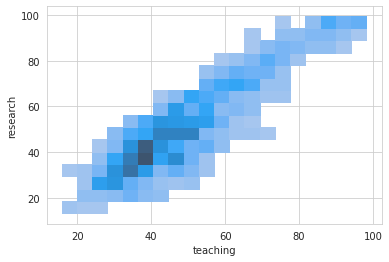

In [152]:
sns.histplot(data=uniDataframe,x='teaching',y='research')

Kernal density estimation is used to plot the graph between total score and year.

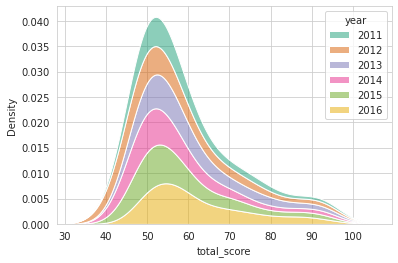

In [153]:
sns.kdeplot(data=uniDataframe,x='total_score',hue='year',multiple='stack',palette='Dark2',alpha=0.5)

**Relation between Income and Teaching.**

Scatter plot drawn between income and teaching.

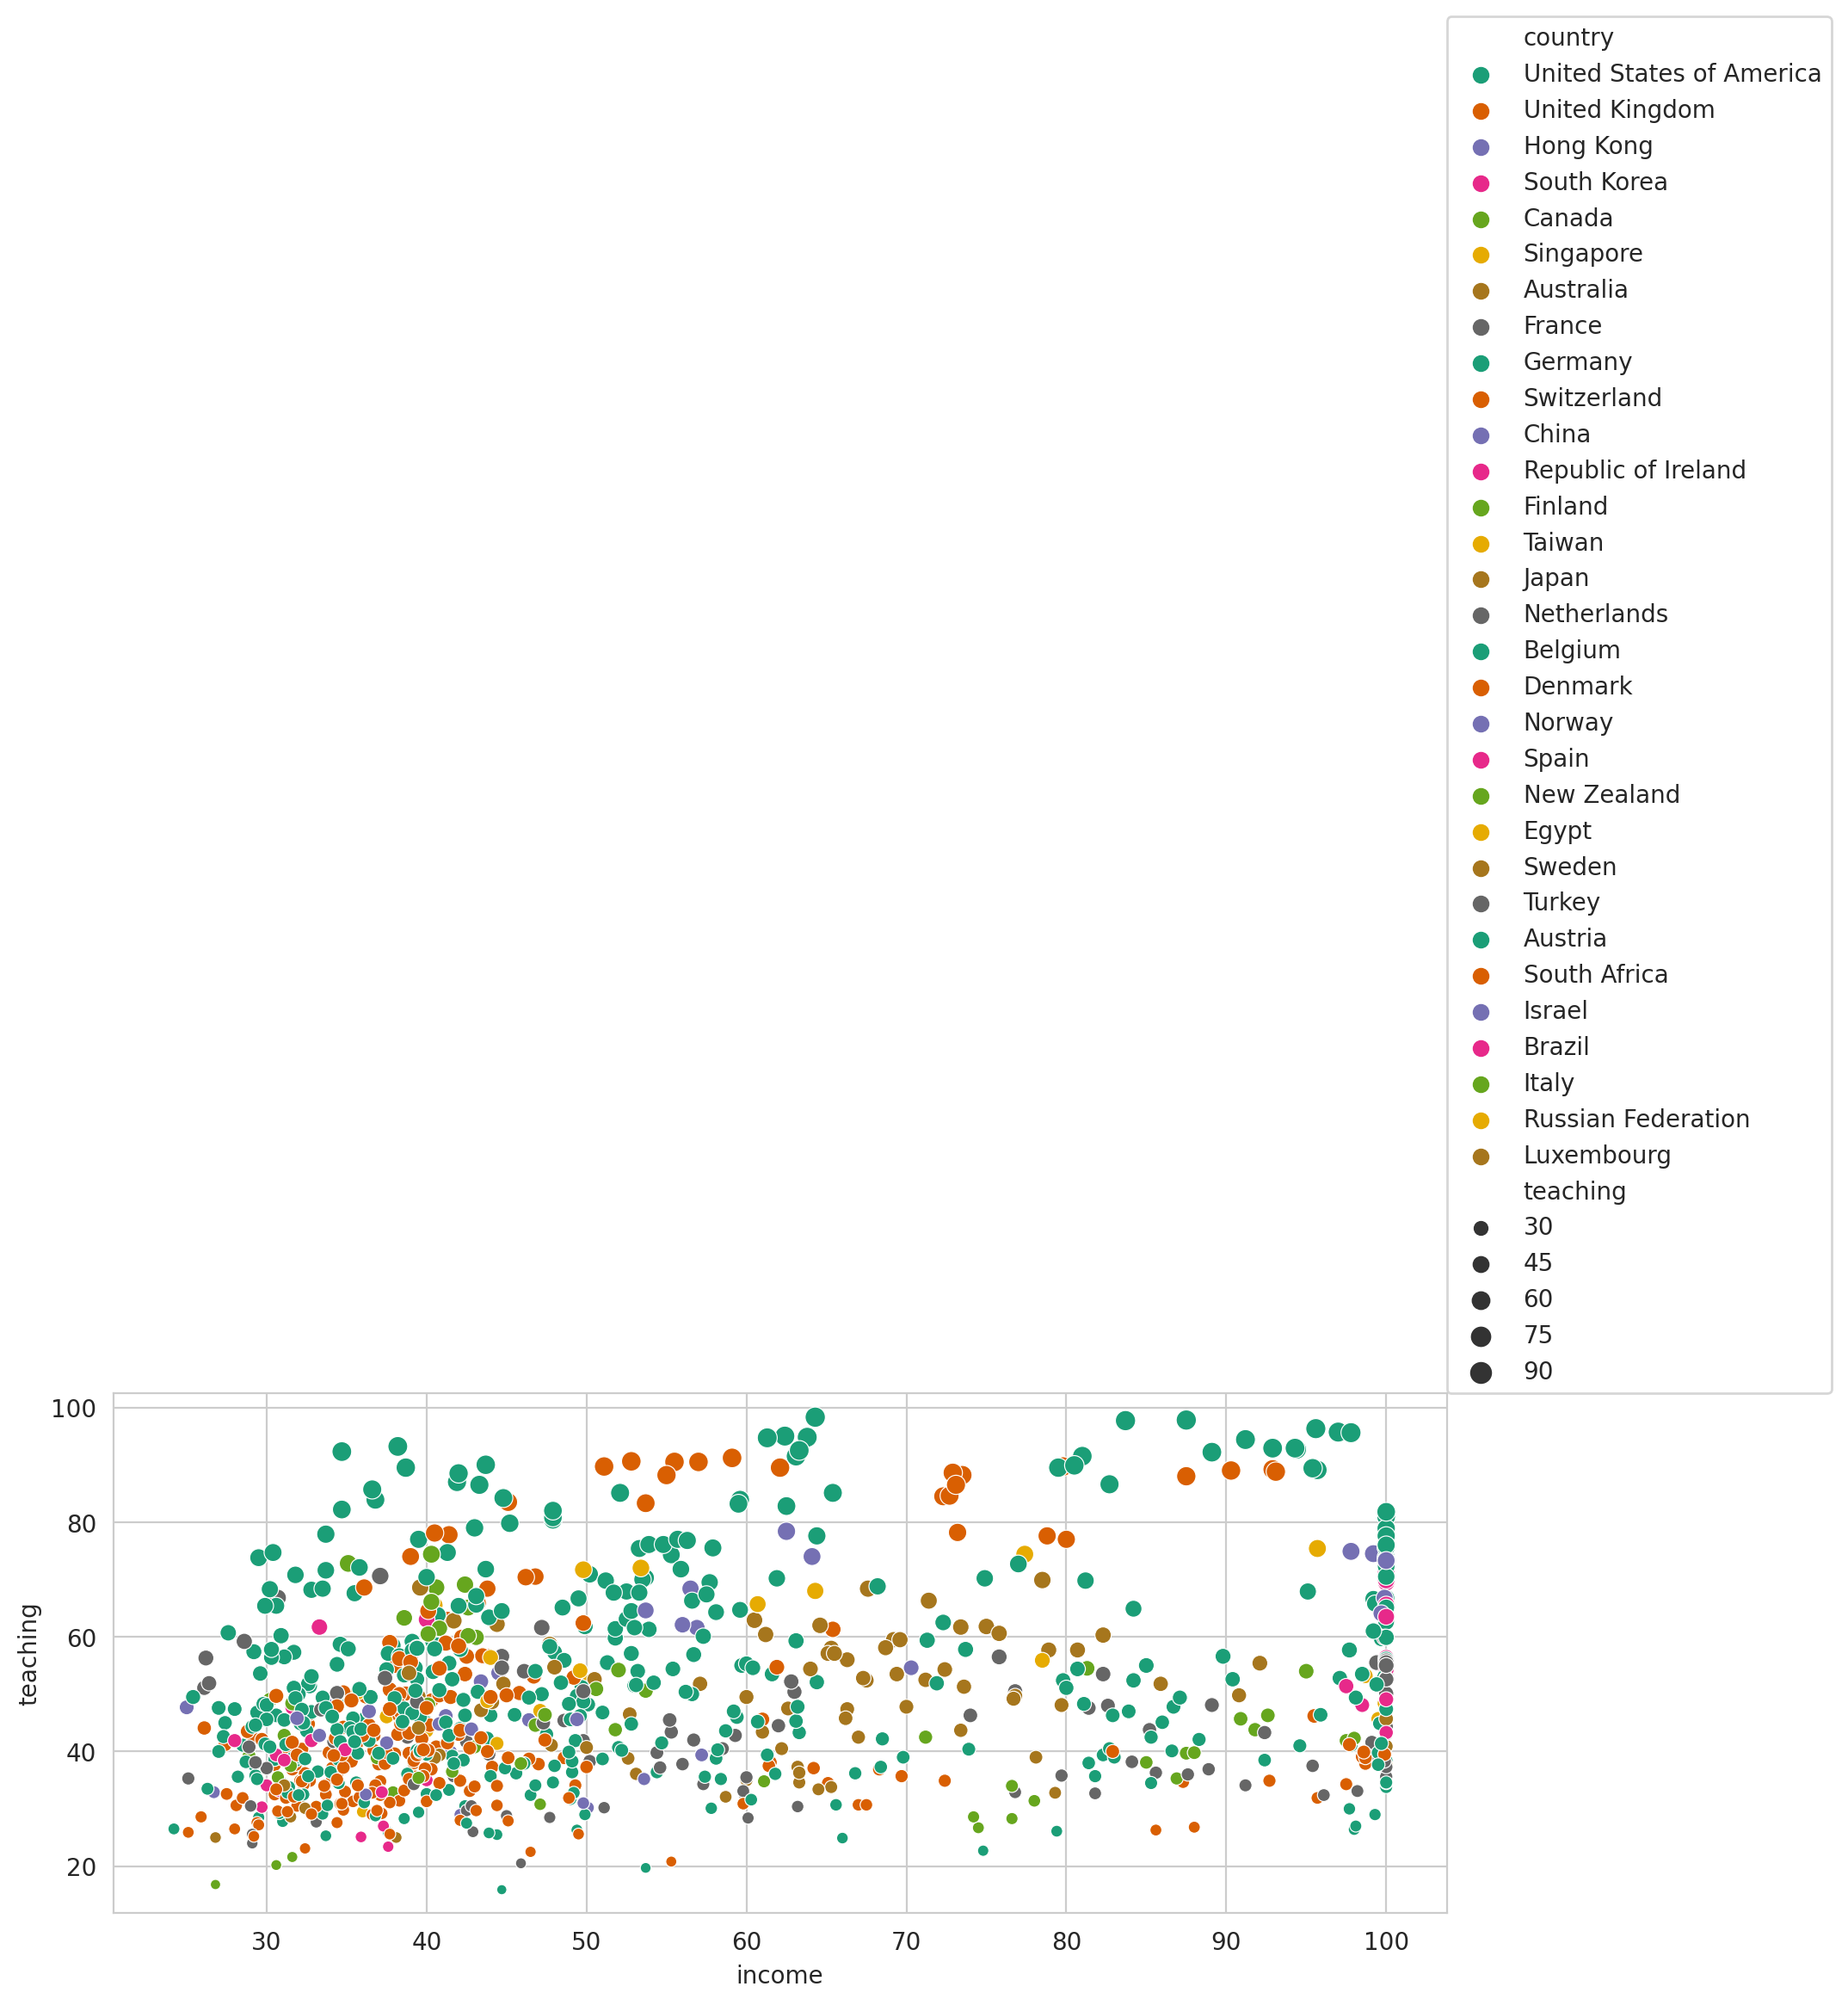

In [154]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=uniDataframe,x="income",y="teaching",hue="country",palette="Dark2",size="teaching")
plt.legend(loc=[1,1])

Income and teaching have positive correlation. In the range of 30-40 the correlation is more.

**Relationship between International and Teaching using joint plot.**

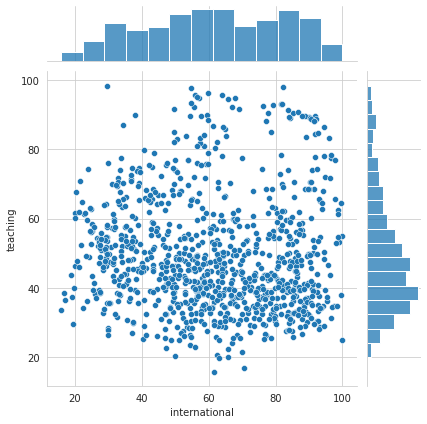

In [155]:
sns.jointplot(data=uniDataframe,x='international',y='teaching')

The joint plot contains three different portions. The marginal portion describes the relationship between Teaching depending variables with International independent variables. It results positive correlation. The second portion of the graph which is top of the model placed horizentionally explains distribution of independent International column, and the third part describes the distribution of dependent Teaching values.

This dist plot discribes the distribution of Teaching over years. The quality of teaching in 2013 is good. 

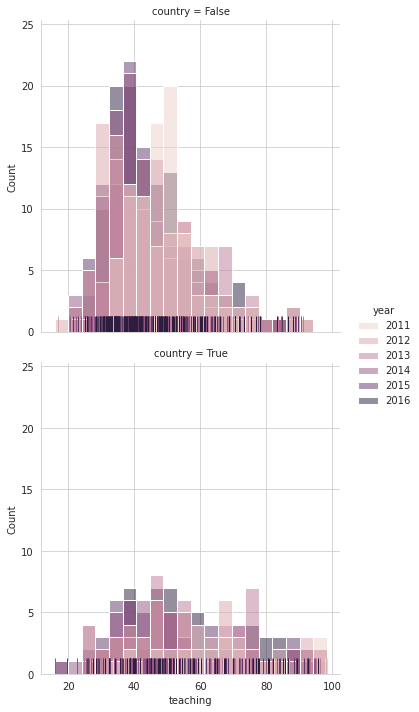

In [156]:
sns.displot(data=uniDataframe,x='teaching',kde=False,rug=True,rug_kws={'height':0.05},hue='year',row=(uniDataframe['country']=='United States of America'))

**Top ten universities teaching score.**

In [157]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

topTenUni = uniDataframe.iloc[:10,:]
data = go.Bar(
                x = topTenUni.university_name,
                y = topTenUni.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(10,0,0)',width=2)),
                text = topTenUni.teaching)

layout = go.Layout(barmode = "group",hovermode=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Stanford university is good at teaching as per study.

**Citations and Teaching of top 10 universities in 2013**

In [158]:

uniDataframe2013 = uniDataframe[uniDataframe.year == 2013].iloc[:10,:]
x = uniDataframe2013.university_name

a = {
  'x': x,
  'y': uniDataframe2013.citations,
  'name': 'citation',
  'type': 'bar',
  'marker':dict(color='#770737'),
  'text': uniDataframe2013.citations,
};
b = {
  'x': x,
  'y': uniDataframe2013.teaching,
  'name': 'teaching',
  'type': 'bar',
  'marker':dict(color="#9f5173"),
  'text': uniDataframe2013.teaching,
};
c = {
    'x':x,
    'y':uniDataframe2013.research,
    'name':'research',
    'marker':dict(color='#d6b4c3'),
    'type':"bar",
    'text': uniDataframe2013.research
}
layout = {
  'xaxis': {'title': 'Top 10 universities'},
  'barmode': 'relative',
  'title': 'Citations and Teaching of top 10 universities in 2013',
  'template' : 'plotly_white',
  'hovermode' : False
};
fig = go.Figure(data = [a, b, c], layout = layout)
fig.update_traces(textposition='inside')
iplot(fig)

**Teaching over years**


**The box plot is used to describe the statistical values like mean, outliers, min and max values.**

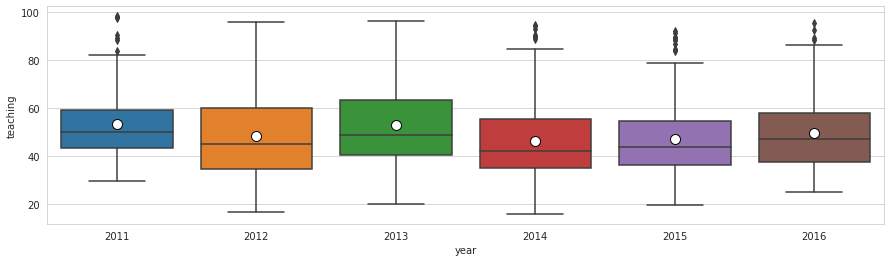

In [159]:
plt.figure(figsize=(15,4))
sns.boxplot(x='year',y='teaching',data = uniDataframe,showmeans=True,meanprops={"marker":"o",
                                                                                 "markerfacecolor":"white",
                                                                                 "markersize":"10",
                                                                                 "markeredgecolor":"black"})
plt.show()

As per study the teaching quality in 2013 is good.

**Relationship between Total score and Teaching**

Linear mode (Lmplot) is used to plot the linear regression between variables. 

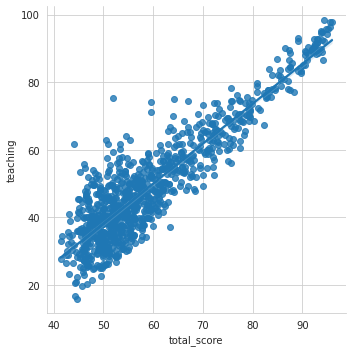

In [160]:

sns.set_style('whitegrid')
sns.lmplot(x ='total_score', y ='teaching', data = uniDataframe)

Teaching has positive relation with Total score.

**Country based teaching is explained throw bar graph.**

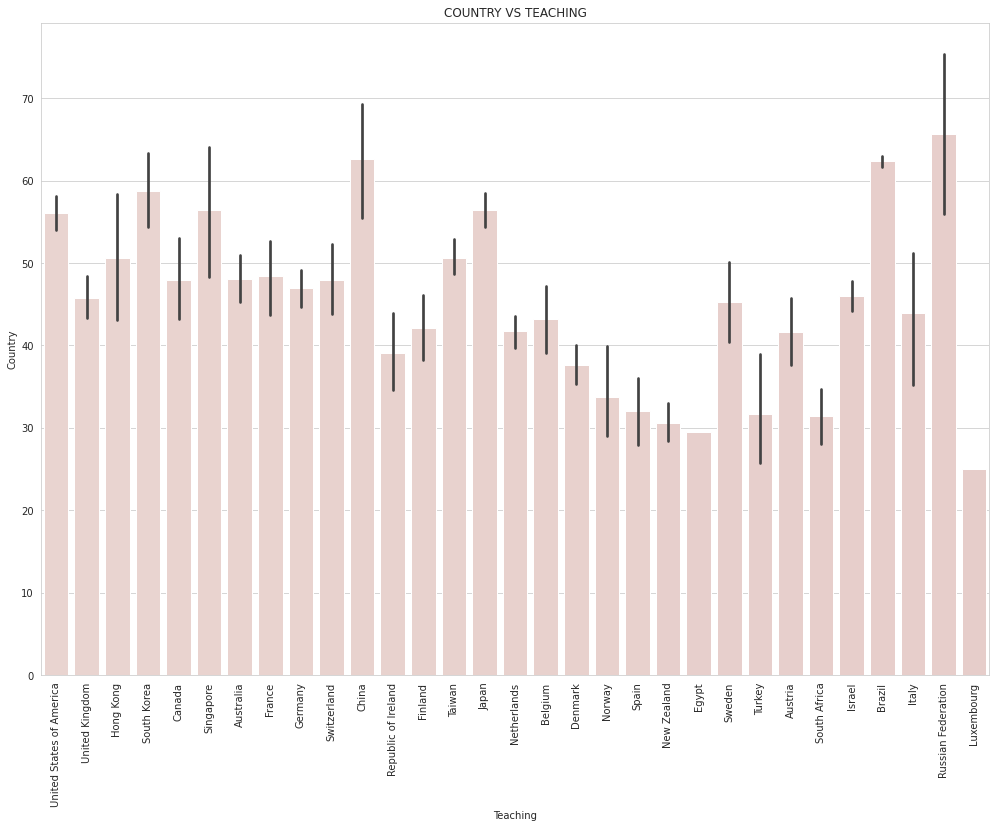

In [161]:
plt.figure(figsize = (17,12))
sns.barplot(x = uniDataframe["country"] , y = uniDataframe["teaching"] , palette = sns.cubehelix_palette(len(uniDataframe)))
plt.xticks(rotation = 90)
plt.title("COUNTRY VS TEACHING")
plt.xlabel("Teaching")
plt.ylabel("Country")
plt.show()

**Outliers removing code for teaching**

In [162]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5 * IQR)
  upper_range = Q3+(1.5 * IQR)
  return lower_range, upper_range

In [163]:
minteaching, maxteaching = remove_outlier(uniDataframe['teaching'])
uniDataframe['teaching'] = np.where(uniDataframe['teaching']>maxteaching,maxteaching,uniDataframe['teaching'])
uniDataframe['teaching'] = np.where(uniDataframe['teaching']<minteaching,minteaching,uniDataframe['teaching'])


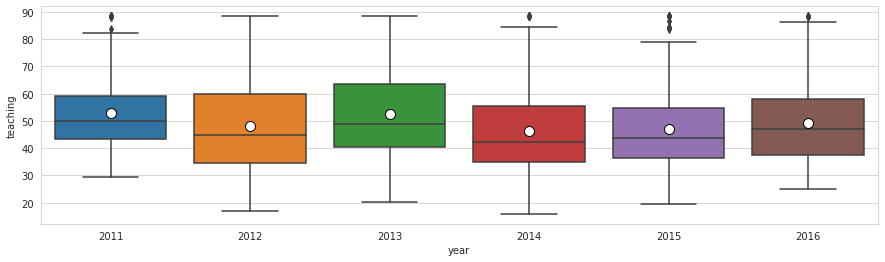

In [164]:
plt.figure(figsize=(15,4))
sns.boxplot(x='year',y='teaching',data = uniDataframe,showmeans=True,meanprops={"marker":"o",
                                                                                 "markerfacecolor":"white",
                                                                                 "markersize":"10",
                                                                                 "markeredgecolor":"black"})
plt.show()

**How Citations are affecting Teaching**

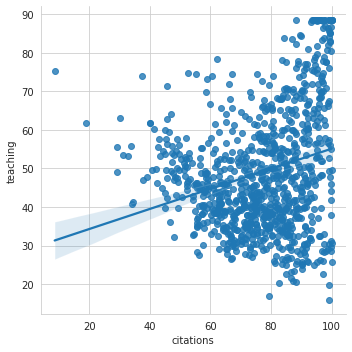

In [165]:
sns.set_style('whitegrid')
sns.lmplot(x ='citations', y ='teaching', data = uniDataframe)

According to the results citations are not affecting teaching. 

# Machine learning algorithms

**Data Pre- processing**

Taking unique values for country.

In [166]:
uniDataframe2['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

Train data set as per the correllogram result teaching variable depends on income, citations, research, international, num_students and country.

In [167]:
X = uniDataframe2[['income','citations','research','international','num_students','country']].values

country = preprocessing.LabelEncoder()
country.fit(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'])

LabelEncoder()

Transforming the train data for better results.

In [168]:
X[:,5] = country.transform(X[:,5])

Converting to float type.

In [169]:
X = X.astype(float)

Normaliazing the input.

In [170]:
X=stats.zscore(X)
X

array([[-0.75890809,  1.64197502,  2.95471103,  0.92461591, -0.18186027,
         1.01382855],
       [ 1.23217096,  1.6896585 ,  2.92177098,  0.11778243, -1.18991674,
         1.01382855],
       [ 1.38595349,  1.6896585 ,  2.61119329,  1.37336038, -0.69284004,
         1.01382855],
       ...,
       [-0.62131319, -1.06297871, -1.20985336, -1.62733494, -1.08415215,
        -0.59056689],
       [-0.52014048, -2.05566205, -0.93692146, -1.30097533, -0.74670737,
        -0.59056689],
       [-0.54442193, -1.40109793, -0.82868984, -1.55481058, -0.82854969,
         0.70077578]])

Assigning target variable.

In [171]:
Y = uniDataframe2['teaching'].values

**Pre-processing**

In [172]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv=PolynomialFeatures(degree=3)

Fitting the input.

In [173]:
poly_feat=poly_conv.fit_transform(X)

Splitting the data into 7:3 ratio with random state 101.

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(poly_feat,Y,test_size=0.3,random_state=101)


In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Scalar removes the mean and scales the each independent variable.

In [176]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [178]:
model=LinearRegression()

Fitting the input.

In [179]:
model.fit(X_train,Y_train)

LinearRegression()

Predecting the test independent data.

In [180]:
y_pred=model.predict(X_test)

Finding mean absolute error.

In [181]:
mean_absolute_error(Y_test,y_pred)

4.865913307918574

Mean squared error: It describes the distance between points with regression line.

In [182]:
np.sqrt(mean_squared_error(Y_test,y_pred))

6.319772117426166

R2 score is used to evaluate the performace of the regression model.

In [183]:
r2_score(Y_test,y_pred)

0.8801181475443041

# KNN

It a supervised algorithm which is used to predict the accuracy of the test data. Based on nearest neighbours the algorithm determines the class of the variable.

Import required libraries

In [184]:
from sklearn.neighbors import KNeighborsRegressor

In [185]:
k = 2
#Training the Model and Predict the data
neigh = KNeighborsRegressor(n_neighbors = k).fit(X_train,Y_train)

In [186]:
testDataAccuracy = neigh.predict(X_test)
testDataAccuracy

array([44.4 , 47.35, 68.75, 85.15, 44.05, 72.9 , 36.3 , 16.15, 19.85,
       16.5 , 38.6 , 28.9 , 65.3 , 21.1 , 39.  , 46.35, 44.05, 74.  ,
       53.75, 19.  , 25.  , 38.55, 66.85, 28.  , 34.85, 44.1 , 83.9 ,
       36.75, 36.75, 23.35, 20.35, 17.9 , 21.15, 47.4 , 18.95, 36.1 ,
       46.4 , 44.05, 35.8 , 38.45, 24.55, 61.25, 27.6 , 61.8 , 78.25,
       22.5 , 33.05, 40.75, 39.3 , 58.95, 42.  , 32.75, 22.65, 27.9 ,
       27.45, 18.5 , 22.1 , 39.05, 26.75, 45.05, 36.05, 55.4 , 39.7 ,
       21.35, 38.25, 32.85, 37.6 , 18.05, 34.75, 55.35, 32.75, 20.  ,
       32.5 , 43.35, 34.1 , 18.4 , 44.7 , 23.1 , 48.95, 29.45, 43.75,
       25.25, 36.45, 26.75, 38.45, 35.45, 19.15, 29.45, 16.1 , 18.7 ,
       44.1 , 52.1 , 50.65, 23.5 , 35.25, 42.25, 22.35, 22.15, 73.85,
       91.15, 44.4 , 18.15, 83.9 , 84.9 , 82.5 , 32.75, 48.9 , 61.7 ,
       22.3 , 25.75, 24.45, 20.8 , 19.6 , 19.85, 57.75, 47.85, 35.1 ,
       30.3 , 31.05, 93.1 , 21.45, 31.4 , 16.75, 36.9 , 38.65, 18.2 ,
       33.65, 37.  ,

Calculation of mean absolute error.

In [187]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(Y_test, testDataAccuracy))

Mean absolute error:  4.7832906530089625


In [188]:
Ks = 20
r2Score = np.zeros((Ks-1))
abs_error = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsRegressor(n_neighbors = n).fit(X_train,Y_train)
    testDataPred=neigh.predict(X_test)
    r2Score[n-1] = metrics.r2_score(Y_test, testDataPred)
    abs_error[n-1] = metrics.mean_absolute_error(Y_test, testDataPred)
    

r2Score
abs_error

array([5.1099872 , 4.78329065, 4.85057618, 4.86338028, 4.93162612,
       5.01899274, 5.08562283, 5.14081306, 5.19418125, 5.2678233 ,
       5.33425678, 5.41407384, 5.46999902, 5.51119444, 5.55690141,
       5.59383803, 5.67655344, 5.74561815, 5.81921962])

Plot the graph R2 score vs K neighbours.

Text(0.5, 0, 'Number of Neighbours (K)')

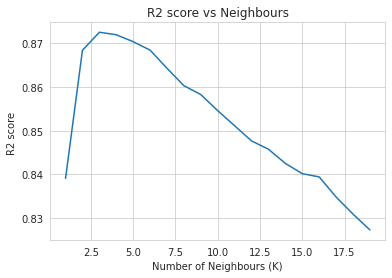

In [189]:
plt.plot(range(1,Ks),r2Score)
plt.title('R2 score vs Neighbours')
plt.ylabel('R2 score ')
plt.xlabel('Number of Neighbours (K)')

Plot the graph Absolute error vs K neighbours

Text(0.5, 0, 'Number of Neighbours (K)')

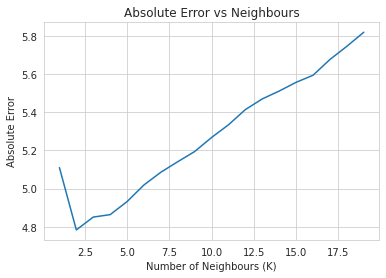

In [190]:
plt.plot(range(1,Ks),abs_error)
plt.title('Absolute Error vs Neighbours')
plt.ylabel('Absolute Error')
plt.xlabel('Number of Neighbours (K)')

# SVR

Support vector regression algorithm is used to predict discreate values.

Importing libraries

In [191]:
from sklearn.svm import SVR

gamma parameter defines how far the influence of a single training example reaches. C set before the training model and used to control error. kernel is used for coloring the plot.

In [192]:
svr=SVR(kernel="rbf",gamma="auto",C=2,epsilon=0.1)

In [193]:
svr.fit(X_train,Y_train)

SVR(C=2, gamma='auto')

Test data prediction.

In [194]:
y_p=svr.predict(X_test)

mean absolute error

In [195]:
mean_absolute_error(Y_test,y_p)

6.102225626661662

Mean squared error

In [196]:
np.sqrt(mean_squared_error(Y_test,y_p))

8.555503093921862

R2 score

In [197]:
r2_score(Y_test,y_p)

0.7802941030669925

# The final report is that Teaching variable is more depend on Research column and KNN machine learning algorithm is the best suited algorithm for this data set. United states is providing best educaction based on the report but after removing outliers Russian Federation is providing good teaching and least Luxembourg.